## 读取文件并展示

In [6]:
# import json
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题


In [2]:
data=pd.read_csv("data/lastfm_asia_edges.csv")
display(data)

,node_1,node_2
0,0,747
1,1,4257
2,1,2194
3,1,580
4,1,6478
...,...,...
27801,7488,7564
27802,7505,7579
27803,7533,7536
27804,7569,7587


In [3]:
edges = data.values.tolist()
edges = [[int(edge[0]), int(edge[1])] for edge in edges]
graph = nx.from_edgelist(edges)
## 
def Viewgraph(name,graph=graph,layout=nx.spring_layout,node_size=10,**kw):
    """定义一个可视化graph的函数"""
    nx.draw(graph,layout=layout,node_size=node_size,**kw)
    plt.savefig("../大作业latex/tex/figures/"+name+".eps",dpi=400)
    plt.show()


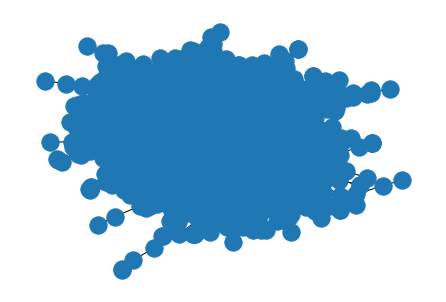

In [10]:
# 可视化 花费5m左右
# nx.draw(graph,layout=nx.spring_layout,node_size=node_size)

# plt.show()
Viewgraph("网络图")

## 节点重要性指标

In [26]:
def Stat_cen(centrality:dict,ax,name:str):
    """输入中心性，输出相应的报告"""
    cen=pd.Series(centrality).sort_values(ascending=False)
    print(name+"最大的3个节点：\n",cen.head(3))
    ax.hist(cen)
    ax.set_xlabel(name)
    ax.set_ylabel("数量")
    # ax.show()
    # ax.close()
    plt.savefig("../大作业latex/tex/figures/"+name+".eps",dpi=400)
    plt.show()
    plt.close()
    return cen

度中心性最大的3个节点：
 7237    0.028335
3530    0.022957
4785    0.022826
dtype: float64


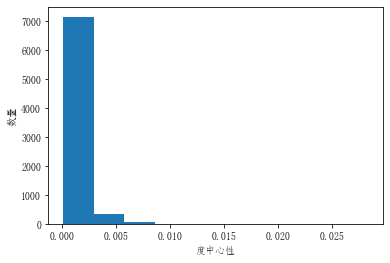

In [38]:
# 寻找在各种指标测度下最重要的三个节点
## 度中心性节点
deg_cen_dic=nx.degree_centrality(graph)
ax=plt.subplot()
deg_cen=Stat_cen(deg_cen_dic,ax,"度中心性")

介数中心性最大的3个节点：
 7237    0.028335
3530    0.022957
4785    0.022826
dtype: float64


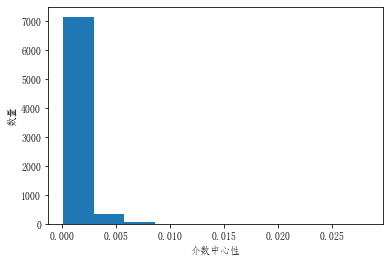

In [39]:
# 介数中心性  
## !!!耗时较长，20min
bet_cen_dic=nx.betweenness_centrality(graph)
ax=plt.subplot()
bet_cen=Stat_cen(bet_cen_dic,ax,"介数中心性")

接近中心性最大的3个节点：
 7237    0.028335
3530    0.022957
4785    0.022826
dtype: float64


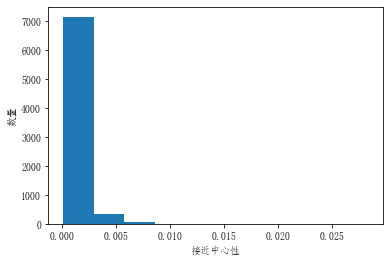

In [40]:
## 5min
close_cen_dic=nx.closeness_centrality(graph)
ax=plt.subplot()
close_cen=Stat_cen(close_cen_dic,ax,"接近中心性")


K-core中心性最大的3个节点：
 427     20
3240    20
1348    20
dtype: int64


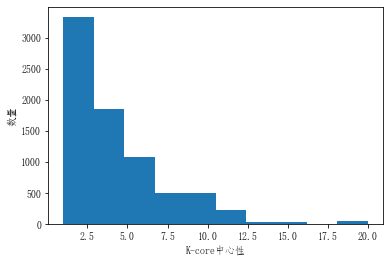

In [27]:
## K-shell
core_dic=nx.core_number(graph)
ax=plt.subplot()
core_cen=Stat_cen(core_dic,ax,"K-core中心性")

In [ ]:
eigen_dic=nx.eigenvector_centrality(graph)
ax=plt.subplot()
eigen_cen=Stat_cen(eigen_dic,ax,"特征向量中心性")

In [ ]:

page_dic=nx.pagerank(graph)
ax=plt.subplot()
page_cen=Stat_cen(page_dic,ax,"PageRank中心性")


## 节点相似性指标

### AA指标

In [17]:
## 给id为1人推荐好友
targetUsers= data.loc[data["node_1"]==1, ['node_1']]
dfRel= data
# 关联二度好友
df2 = pd.merge(targetUsers, dfRel, left_on=['node_1'], right_on=['node_1'])
df2 = pd.merge(df2, dfRel, left_on=['node_2'], right_on=['node_1'])
df2=df2.loc[:,["node_1_x","node_2_x","node_2_y"]]
df2.columns=["ID","FriendId","ffId"]
display(df2)
Recommend=[]
for i in graph.nodes:
    if i in df2.FriendId and i in df2.ffId:
        continue
    Recommend.append((1,i))
display(len(Recommend))

,ID,FriendId,ffId
0,1,4257,4864
1,1,4257,6919
2,1,4257,4811
3,1,4257,4821
4,1,4257,5595
...,...,...,...
655,1,2639,3271
656,1,2639,6617
657,1,2639,3739
658,1,2639,5949


6964

In [21]:
dfRecommend=pd.DataFrame(Recommend)
dfRecommend.columns=["id","潜在好友id"]
dfRecommend

,id,潜在好友id
0,1,747
1,1,4257
2,1,2194
3,1,6478
4,1,1222
...,...,...
6959,1,7594
6960,1,7276
6961,1,7277
6962,1,7420


In [65]:
# 计算Adamic Adar指数
# 补充community信息；不补充会报错
for i in range(len(graph.nodes)):
    graph.nodes[i]['community']=0
preds = nx.adamic_adar_index(graph,Recommend) #第二个参数如果省略，算的是整个网络的共同好友数
list_preds=[]
for u, v, p in preds:
    print('(%d, %d) -> %.8f' % (u, v, p))
    list_preds.append(p)
dfRecommend["AA_preds"]=list_preds


(1, 747) -> 0.00000000
(1, 4257) -> 0.00000000
(1, 2194) -> 0.31066747
(1, 6478) -> 0.00000000
(1, 1222) -> 0.00000000
(1, 5735) -> 0.00000000
(1, 7146) -> 0.00000000
(1, 2204) -> 0.31892899
(1, 2639) -> 0.00000000
(1, 1492) -> 0.00000000
(1, 5303) -> 0.00000000
(1, 7128) -> 0.00000000
(1, 4154) -> 0.00000000
(1, 5179) -> 0.00000000
(1, 1728) -> 0.00000000
(1, 4560) -> 0.00000000
(1, 5060) -> 0.00000000
(1, 1351) -> 0.00000000
(1, 6503) -> 0.00000000
(1, 7089) -> 0.00000000
(1, 4319) -> 0.00000000
(1, 6095) -> 0.00000000
(1, 4433) -> 0.00000000
(1, 2900) -> 0.00000000
(1, 3381) -> 0.00000000
(1, 5943) -> 0.00000000
(1, 2107) -> 0.00000000
(1, 6940) -> 0.00000000
(1, 2013) -> 0.00000000
(1, 6046) -> 0.00000000
(1, 5823) -> 0.00000000
(1, 5770) -> 0.00000000
(1, 5454) -> 0.00000000
(1, 5856) -> 0.00000000
(1, 667) -> 0.00000000
(1, 6180) -> 0.00000000
(1, 870) -> 0.00000000
(1, 3079) -> 0.00000000
(1, 1834) -> 0.00000000
(1, 6283) -> 0.00000000
(1, 7340) -> 0.00000000
(1, 7279) -> 0.0000

### 自己构建的指标
* AA指标*|x所处的核心数-y所处的核心层数|

In [66]:
dfRecommend.loc[:,"Core_User"]=core_cen[core_cen.index==1].item()
dfRecommend["Core_ffid"]=0
for i in dfRecommend.index:
    temp=core_cen.index==dfRecommend.loc[dfRecommend.index==i,"潜在好友id"].item()
    dfRecommend.loc[dfRecommend.index==i,"Core_ffid"]=core_cen[temp].item()
    if np.any(temp):
        continue
    else:
        print(i)
dfRecommend["My_pred"]=dfRecommend["AA_preds"]*np.abs(dfRecommend["Core_ffid"]-dfRecommend["Core_User"])
dfRecommend

,id,潜在好友id,AA_preds,Core_User,Core_ffid,My_pred
0,1,747,0.000000,5,5,0.000000
1,1,4257,0.000000,5,6,0.000000
2,1,2194,0.310667,5,10,1.553337
3,1,6478,0.000000,5,8,0.000000
4,1,1222,0.000000,5,6,0.000000
...,...,...,...,...,...,...
6959,1,7594,0.000000,5,1,0.000000
6960,1,7276,0.000000,5,1,0.000000
6961,1,7277,0.000000,5,1,0.000000
6962,1,7420,0.000000,5,1,0.000000


## 挖掘社团结构
利用课堂上提供的一个社交网络数据，利用三种以上的社团发掘算法挖掘其社团结构，比较结果的差异（如运行时间，社团数量）。

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

from sklearn import metrics
from sklearn.datasets import make_blobs


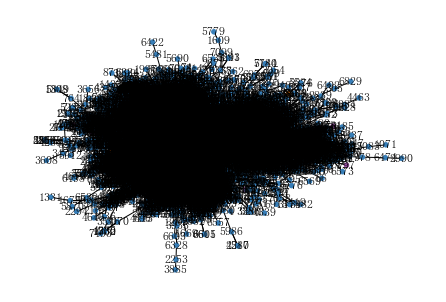

In [8]:
A = pd.DataFrame(nx.adjacency_matrix(graph).todense())
layout = nx.spring_layout(graph)
# k均值聚类法
kmeans = KMeans(n_clusters=4, random_state=42)
# 训练聚类模型
kmeans.fit(A)
# 聚类结果
y = kmeans.predict(A)

from matplotlib import cm # 节点颜色
colors = []
for node in graph.nodes:
    colors.append(cm.Set1(y[node]+1))
    
nx.draw(graph,pos=layout,node_color=colors,node_size=node_size)# 绘制网络

In [ ]:
## Q greedy 算法
from networkx.algorithms.community import greedy_modularity_communities
c = greedy_modularity_communities(graph)
print(type(c)) #返回类型是list
[print(str(_)+'\n======') for _ in list(c)]# 展示社团划分结果
a = dict(enumerate(c)) # 获取最大一层的划分
b = [0]*len(graph.nodes) # 节点所属社团的list
for k,v in a.items() :
    for v1 in v:
        b[v1] = k

from matplotlib import cm # 给节点搞点颜色
colors = []
for node in graph.nodes:
    colors.append(cm.Set1(b[node]+1))

nx.draw(graph,pos=layout,with_labels=True) # 画图
nx.draw_networkx_nodes(graph, pos=layout,node_color=colors,node_size=node_size) # 上色
plt.show()

In [ ]:
from networkx.algorithms.community import k_clique_communities
G = nx.karate_club_graph()
print("3派系社团")
c = k_clique_communities(G, 3)
[print(str(_)+'\n======') for _ in list(c)]

print("4派系社团")

c = k_clique_communities(G, 4)
[print(str(_)+'\n======') for _ in list(c)]

layout = nx.spring_layout(graph) # 布局
nx.draw(G,pos=layout)# 绘制网络
plt.show()

array([0, 1, 2, 3])

True